<a href="https://colab.research.google.com/github/waqarmm/AI-Labs/blob/master/CNN_ModuleProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import fnmatch

dir_path = r'/content/drive/MyDrive/origin1'
count = len(fnmatch.filter(os.listdir(dir_path), '*.*'))
print('File Count:', count)

File Count: 45496


In [ ]:
len(os.listdir('/content/drive/MyDrive/origin1'))

45496

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

images_directory = '/content/origin/'
os.chdir(images_directory)
image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']  # Add more if needed
image_count = sum(1 for file in os.listdir('.') if file.lower().endswith(tuple(image_extensions)))

print("Number of images:", image_count)

Number of images: 106962


In [ ]:
len(os.listdir('/content/origin/'))

106962

In [ ]:
!cp -r '/content/origin/' '/content/drive/MyDrive/Colab Notebooks/'

In [ ]:
ls '/content/drive/MyDrive/Colab Notebooks/data/image'

origin.7z.001  origin.7z.003  origin.7z.005  origin.7z.007
origin.7z.002  origin.7z.004  origin.7z.006  origin.7z.008


In [ ]:
ls '/content/drive/MyDrive/Colab Notebooks/data/label'

label.lst  readme.txt


In [ ]:
!cd '/content/drive/MyDrive/Colab Notebooks/'

In [ ]:
!mkdir '/content/drive/MyDrive/origin1_labels/'

In [ ]:
!mkdir labels

In [ ]:
cp '/content/drive/MyDrive/Colab Notebooks/data/label/label.lst' '/content/drive/MyDrive/origin1_labels/'

**Image Preprocessing **bold text** **

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
def preprocess_img(path,target_size=(128,128)):

  img=load_img(path,target_size=target_size)
  img_array=img_to_array(img)
  img_array=img_array/255.0
  return img_array


**Crop and Resize Given dataset Images**

In [ ]:
import os
import cv2

output_folder = "/content/drive/MyDrive/Colab Notebooks/Cropped_Images/"
os.makedirs(output_folder, exist_ok=True)

with open(labels_path, 'r') as f:
    for line in f:
        values = line.strip().split()
        img_name = values[0]
        face_box_top = int(values[2])
        face_box_left = int(values[3])
        face_box_right = int(values[4])
        face_box_bottom = int(values[5])
        label = int(values[7])
        img_path = os.path.join(dset_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            cropped_img = img[face_box_top:face_box_bottom, face_box_left:face_box_right]
            if cropped_img is not None:
                resized_face = cv2.resize(cropped_img, (128, 128))
                normalized_face = resized_face / 255.0


                output_filename = img_name


                output_path = os.path.join(output_folder, output_filename)
                cv2.imwrite(output_path, cropped_img)

print("Cropped and resized!!", output_folder)



Cropped and resized face images saved to folder: /content/drive/MyDrive/Colab Notebooks/Cropped_Images/


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_directory = '/content/drive/MyDrive/Colab Notebooks/DS/Training_ds/'
validation_directory = '/content/drive/MyDrive/Colab Notebooks/DS/validation_ds/'


image_height, image_width = 128, 128
batch_size = 32


datagen = ImageDataGenerator(
    rescale=1.0/255.0,
   shear_range=0.2,
    zoom_range=0.2,

)


train_generator = datagen.flow_from_directory(
    train_directory,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)


validation_generator = datagen.flow_from_directory(
    validation_directory,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'
)




Found 5755 images belonging to 7 classes.
Found 383 images belonging to 7 classes.


**Save Model after 5 Epochs during training to avoid memory issue**

In [4]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/DS/checkpoint-{epoch:02d}.h5',
                             save_weights_only=False,
                             save_best_only=False,
                             period=5)  # Save the model every 5 epochs

**Remove Faulty images from the dataset folder(Cropped)**

In [22]:

import os

folder_path = '/content/drive/MyDrive/Colab Notebooks/DS/Training_ds/disgust/'
image_filenames = [filename for filename in os.listdir(folder_path) if filename.endswith(('.jpg', '.jpeg', '.png'))]

from PIL import Image

for image_filename in image_filenames:
    image_path = os.path.join(folder_path, image_filename)
    try:
        img = Image.open(image_path)
    except PIL.UnidentifiedImageError as e:
        print(f"Error: Cannot identify image file: {image_path}")

**Train Model**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_height, image_width = 128, 128
batch_size = 32

pre_trained_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))


for layer in pre_trained_model.layers:
    layer.trainable = False


model = tf.keras.Sequential([
    pre_trained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

epochs = 30
# for epoch in range(epochs):
#     print(f"Epoch {epoch+1}/{epochs}")
#     for step, (x, y) in enumerate(train_generator):
#         try:
#             history = model.train_on_batch(x, y)
#         except PIL.UnidentifiedImageError as e:
#             print(f"Error: Cannot identify image file in batch {step}. Skipping batch.")
#
#             continue
#         print(f"Step {step+1}/{len(train_generator)} - Loss: {history[0]:.4f}, Accuracy: {history[1]:.4f}")

history=model.fit(train_generator,
          epochs=epochs,
          validation_data=validation_generator, callbacks=[checkpoint])


Epoch 1/30
180/180 [==============================] - 144s 734ms/step - loss: 1.3544 - accuracy: 0.5576 - val_loss: 1.8887 - val_accuracy: 0.2533
Epoch 2/30
180/180 [==============================] - 127s 703ms/step - loss: 1.1848 - accuracy: 0.5934 - val_loss: 1.9563 - val_accuracy: 0.2402
Epoch 3/30
180/180 [==============================] - 127s 707ms/step - loss: 1.1478 - accuracy: 0.6028 - val_loss: 2.0678 - val_accuracy: 0.2637
Epoch 4/30
180/180 [==============================] - 125s 694ms/step - loss: 1.1171 - accuracy: 0.5997 - val_loss: 1.8550 - val_accuracy: 0.2742
Epoch 5/30
180/180 [==============================] - 127s 707ms/step - loss: 1.0930 - accuracy: 0.6109 - val_loss: 1.9015 - val_accuracy: 0.2454
Epoch 6/30
180/180 [==============================] - 126s 698ms/step - loss: 1.0904 - accuracy: 0.6132 - val_loss: 1.8923 - val_accuracy: 0.2507
Epoch 7/30
180/180 [==============================] - 127s 705ms/step - loss: 1.0687 - accuracy: 0.6109 - val_loss: 2.0760 -

**Test Accuracy**

In [6]:
y_true = validation_generator.classes
validation_generator.reset()
y_pred_probs = model.predict(validation_generator)
y_pred = np.argmax(y_pred_probs, axis=1)


accuracy = np.mean(y_true == y_pred)

print("Accuracy:", accuracy)

12/12 [==============================] - 13s 995ms/step
Accuracy: 0.19843342036553524


**Save Trained Model on Drive for future predictions**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import save_model
model_path = '/content/drive/MyDrive/Colab Notebooks/DS/model.h5'
model.save(model_path)

print("Model saved successfully.")

**Load Saved Model from drive and predict**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
model_path = '/content/drive/MyDrive/Colab Notebooks/DS/model.h5'


loaded_model = load_model(model_path)


predictions = loaded_model.predict(new_data)

**Count Number of images in Training and validation folder**

In [ ]:
import os


num_train_images = len(os.listdir(train_directory))
num_val_images = len(os.listdir(validation_directory))

print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_val_images}")


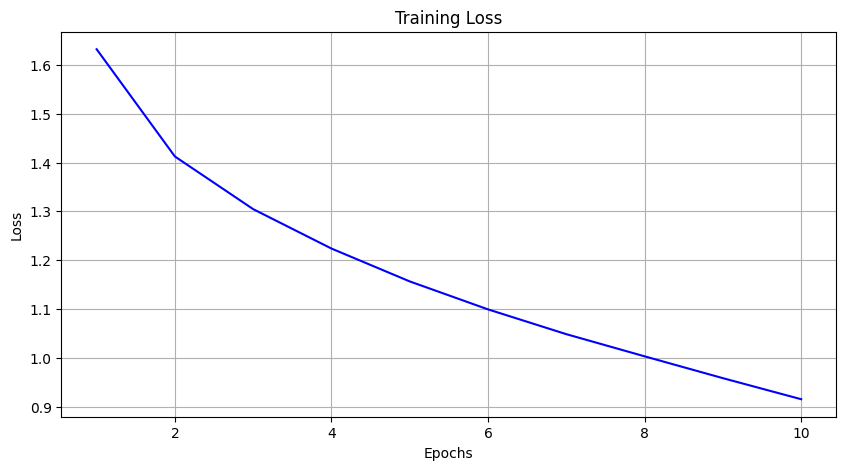

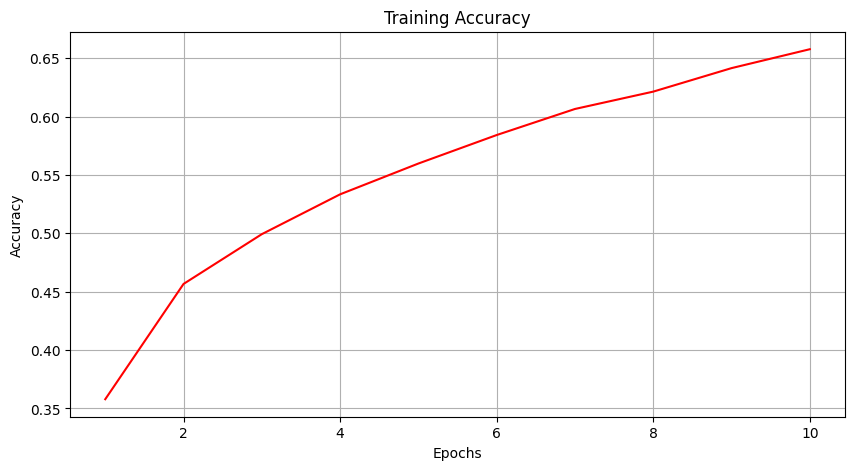

In [ ]:
import matplotlib.pyplot as plt

# Extract loss and accuracy values from the training history
loss = history.history['loss']
accuracy = history.history['accuracy']

# Plot the loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(loss) + 1), loss, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()

# Plot the accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracy) + 1), accuracy, color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
image_path = '/content/happy.jpeg'
preprocessed_image = preprocess_img(image_path)
input_image = np.expand_dims(preprocessed_image, axis=0)
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions, axis=-1)
expression_classes = {
    0: "angry",
    1: "disgust",
    2: "fear",
    3: "happy",
    4: "sad",
    5: "surprise",
    6: "neutral"
}

predicted_expression = expression_classes[predicted_class_index[0]]
print("Predicted Expression:", predicted_expression)

1/1 [==============================] - 0s 180ms/step
Predicted Expression: fear


113/113 [==============================] - 19s 172ms/step


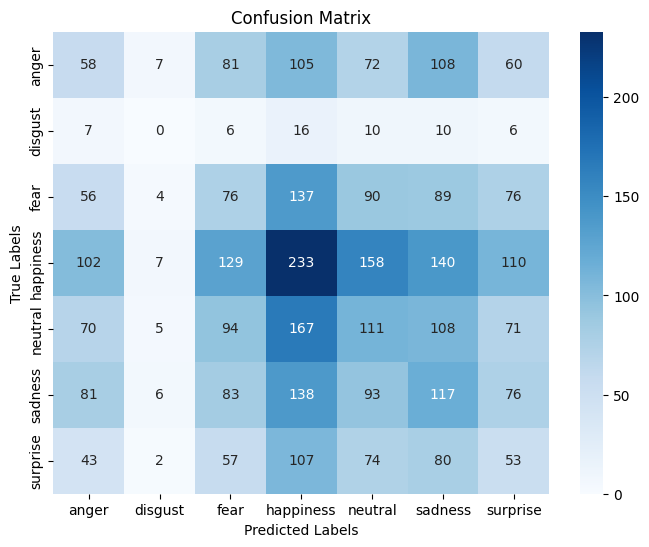

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


y_true = validation_generator.classes
validation_generator.reset()
y_pred_probs = model.predict(validation_generator)
y_pred = np.argmax(y_pred_probs, axis=1)


conf_matrix = confusion_matrix(y_true, y_pred)


class_names = list(validation_generator.class_indices.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


**Load and train Model from the failed Epoch**

In [ ]:
import tensorflow as tf
checkpoint = tf.keras.callbacks.ModelCheckpoint('model_checkpoint.h5', save_best_only=True, save_weights_only=False)


try:
    model = tf.keras.models.load_model('model_checkpoint.h5')
    print("Checkpoint loaded. Resuming training...")
except:
    print("No checkpoint found. Starting training from scratch...")


history = model.fit(train_generator,
                    epochs=epochs,
                    initial_epoch=0,
                    validation_data=validation_generator,
                    callbacks=[checkpoint])